In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('G:/Software/Machine learning/1.1/24 Apriori/Apriori_Python/retail_dataset.csv')

In [3]:
dataset.isnull().sum()

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
0    315 non-null object
1    285 non-null object
2    245 non-null object
3    187 non-null object
4    133 non-null object
5    71 non-null object
6    41 non-null object
dtypes: object(7)
memory usage: 17.3+ KB


In [5]:
dataset.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [6]:
items = (dataset['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [7]:
dataset['1']

0        Wine
1      Cheese
2        Meat
3        Meat
4      Pencil
5       Bread
6      Pencil
7       Bread
8      Diaper
9        Wine
10       Meat
11       Eggs
12     Diaper
13     Cheese
14        NaN
15     Diaper
16      Bagel
17      Bagel
18        NaN
19     Cheese
20     Pencil
21       Eggs
22      Bagel
23       Wine
24       Meat
25        NaN
26       Meat
27       Meat
28      Bagel
29      Bread
        ...  
285    Cheese
286    Cheese
287    Cheese
288     Bagel
289      Meat
290    Diaper
291      Meat
292       NaN
293     Bagel
294       NaN
295    Diaper
296    Pencil
297     Bread
298      Milk
299      Milk
300      Meat
301      Wine
302    Diaper
303      Wine
304     Bread
305    Cheese
306    Diaper
307     Bagel
308       NaN
309    Pencil
310      Eggs
311      Milk
312    Cheese
313    Cheese
314      Wine
Name: 1, Length: 315, dtype: object

In [8]:
encoded_vals = []
for index, row in dataset.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [9]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(10)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.279365,"(Bread, Bagel)"


In [10]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Bagel),0.504762,0.425397,0.279365,0.553459,1.301042,0.064641,1.286787
1,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
2,(Bagel),(Milk),0.425397,0.501587,0.225397,0.529851,1.056348,0.012023,1.060116
3,(Diaper),(Bread),0.406349,0.504762,0.231746,0.570312,1.129864,0.026636,1.152554
4,(Bread),(Milk),0.504762,0.501587,0.279365,0.553459,1.103415,0.026183,1.116164


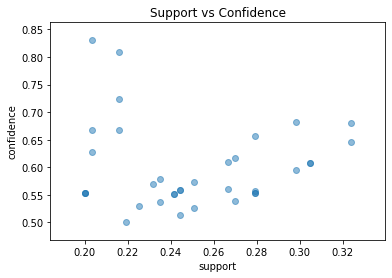

In [15]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

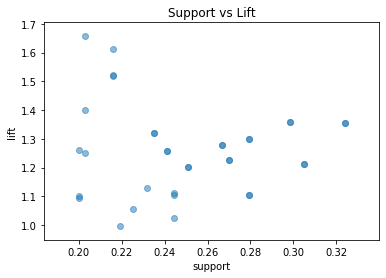

In [16]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

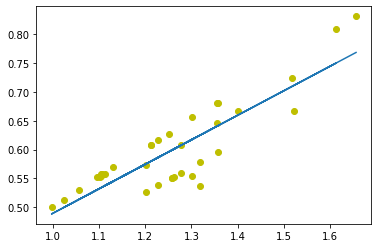

In [17]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))